In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/insurance.csv')
print(df.head())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [ ]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max

In [ ]:
from sklearn.model_selection import train_test_split
X=df.drop('charges',axis=1)
y=df['charges']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
import pandas as pd

def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Example usage
data = {'values': [10, 12, 14, 15, 100, 200, 13, 17, 19, 22, 24]}
df = pd.DataFrame(data)
df_cleaned = remove_outliers(df, 'values')
print(df_cleaned)

    values
0       10
1       12
2       14
3       15
6       13
7       17
8       19
9       22
10      24


In [ ]:
import pandas as pd
from scipy.stats import kurtosis

def calculate_kurtosis(df, column):
    return kurtosis(df[column], fisher=True)

# Example usage
data = {'values': [10, 12, 14, 15, 100, 200, 13, 17, 19, 22, 24]}
df = pd.DataFrame(data)
kurtosis_value = calculate_kurtosis(df, 'values')
print("Kurtosis:", kurtosis_value)

Kurtosis: 3.1385962506943343


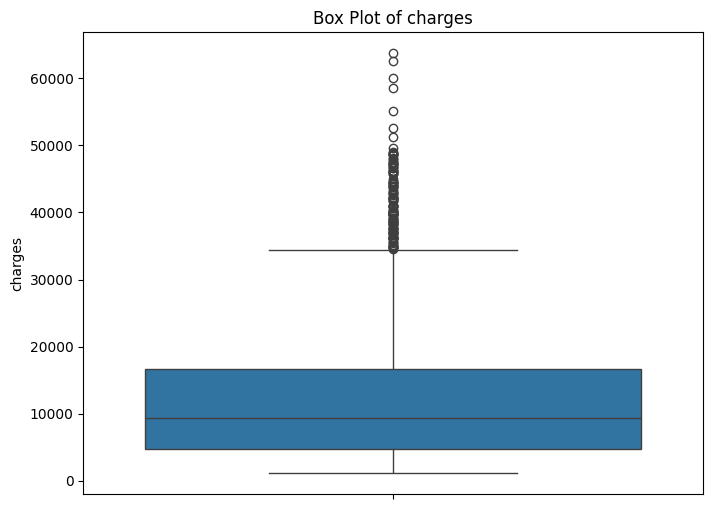

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_box(df, column):
    plt.figure(figsize=(8, 6))
    sns.boxplot(y=df[column])
    plt.title(f'Box Plot of {column}')
    plt.ylabel(column)
    plt.show()

# Load dataset
df = pd.read_csv('/content/insurance.csv')

# Example usage (modify column name as needed)
plot_box(df, 'charges')

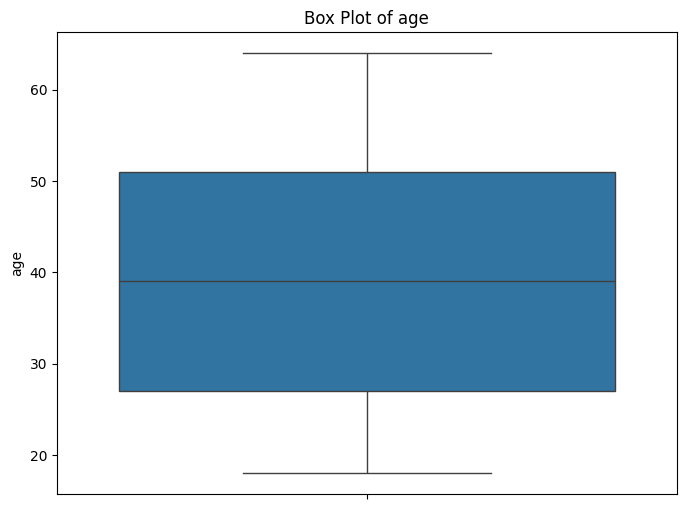

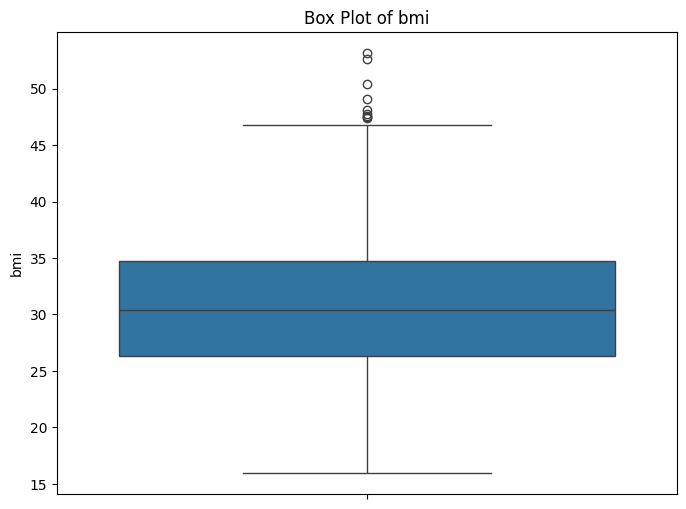

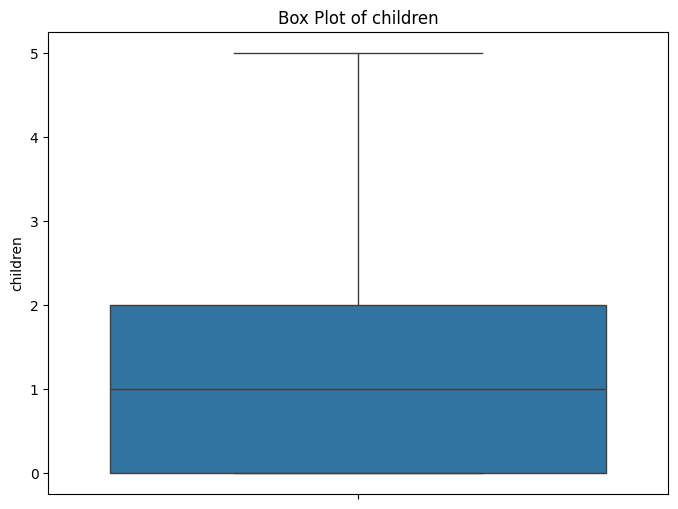

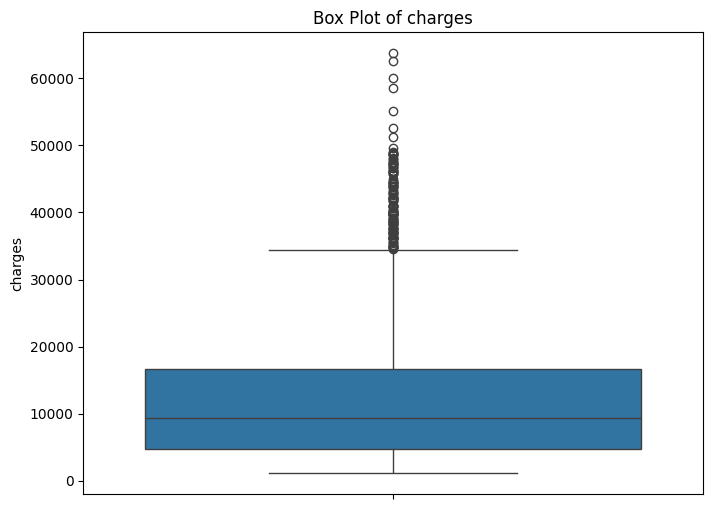

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_box(df):
    numeric_columns = df.select_dtypes(include=['number']).columns
    for column in numeric_columns:
        plt.figure(figsize=(8, 6))
        sns.boxplot(y=df[column])
        plt.title(f'Box Plot of {column}')
        plt.ylabel(column)
        plt.show()

# Load dataset
df = pd.read_csv('/content/insurance.csv')

# Plot box plots for all numeric columns
plot_box(df)


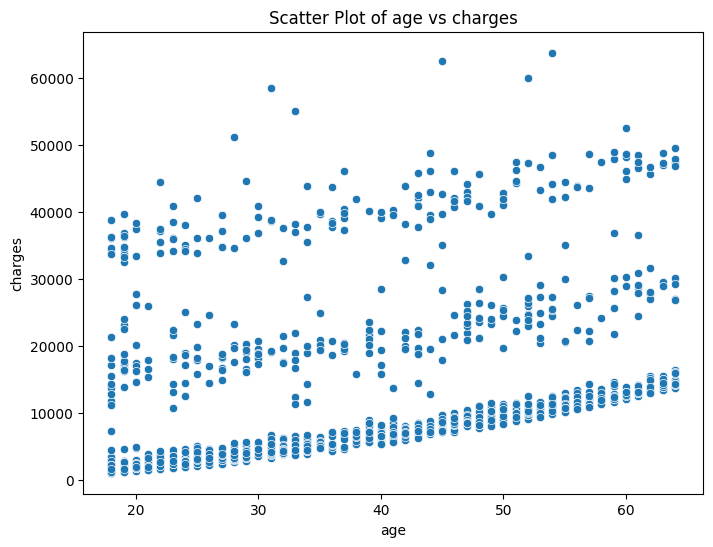

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_scatter(df, x_column, y_column):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=df[x_column], y=df[y_column])
    plt.title(f'Scatter Plot of {x_column} vs {y_column}')
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.show()

# Load dataset
df = pd.read_csv('/content/insurance.csv')

# Example usage (modify column names as needed)
plot_scatter(df, 'age', 'charges')


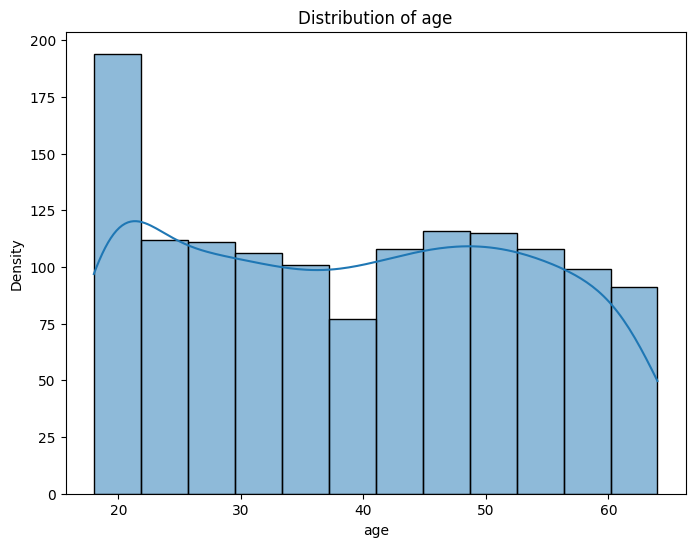

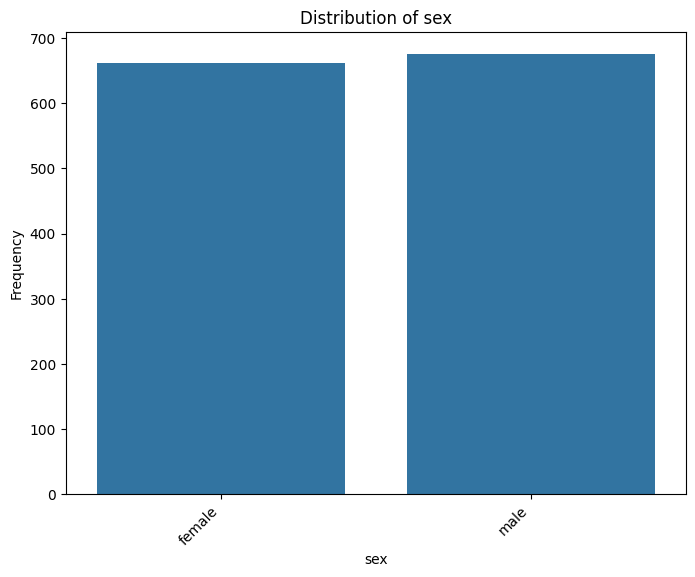

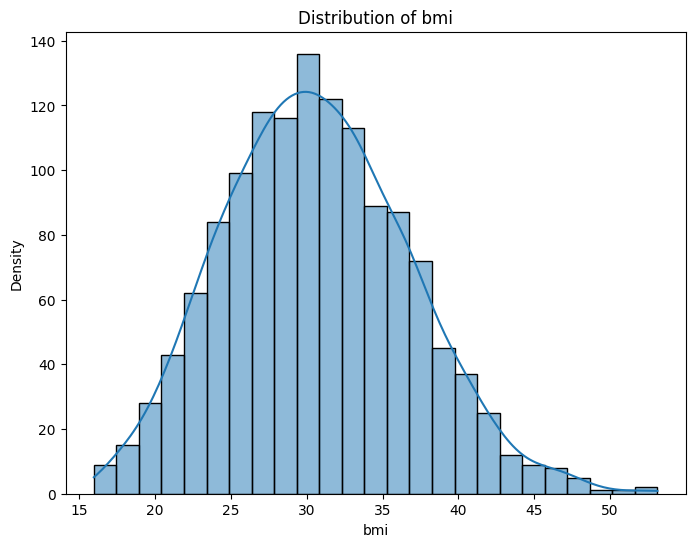

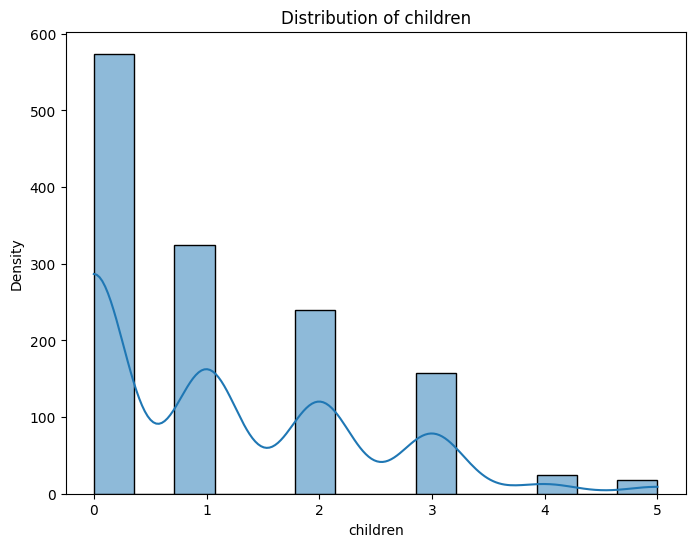

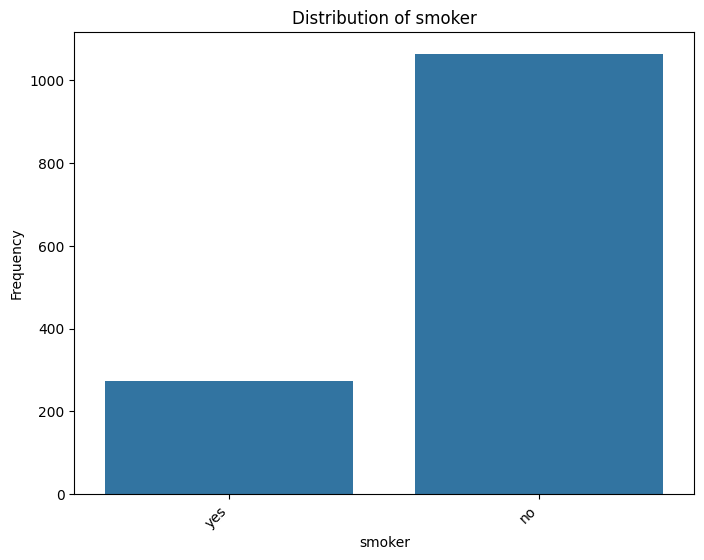

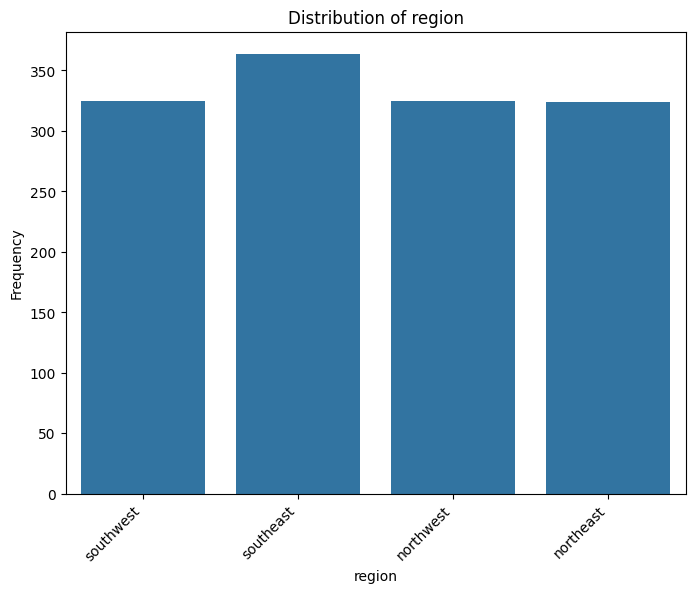

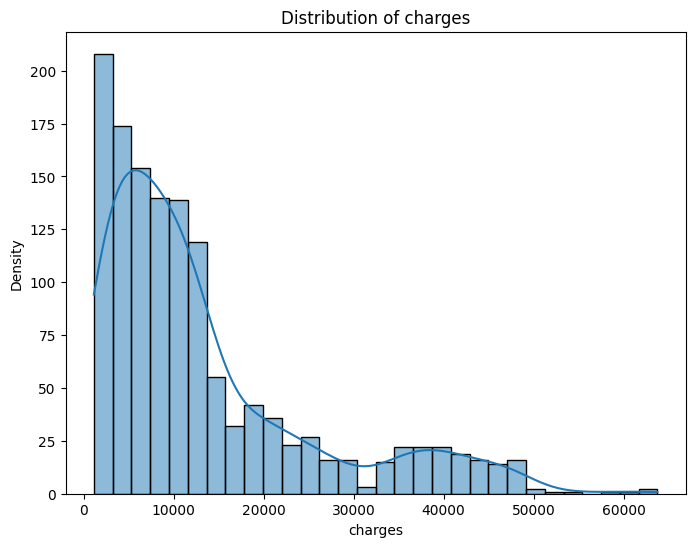

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('/content/insurance.csv')

# Iterate through columns and create histograms
for column in df.columns:
    plt.figure(figsize=(8, 6))  # Adjust figure size as needed

    # Choose an appropriate plot type based on data type
    if df[column].dtype == 'object':  # Categorical data
        sns.countplot(x=column, data=df)
        plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels if needed
    else:  # Numerical data
        sns.histplot(df[column], kde=True)  # Include kernel density estimate

    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency' if df[column].dtype == 'object' else 'Density')
    plt.show()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR  # Import SVR for SVM regression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# ... (your existing code for data loading and preprocessing) ...

# Train an SVM Regression model
model = SVR()  # Create an SVR object
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print("SVM Regression Model:")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2 Score): {r2}")

SVM Regression Model:
Mean Absolute Error (MAE): 8612.408423351833
Root Mean Squared Error (RMSE): 12889.096314656128
R-squared (R2 Score): -0.07008155372454805


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor  # Import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# ... (your existing code for data loading and preprocessing) ...

# Train a Random Forest Regression model
model = RandomForestRegressor(random_state=42)  # Create a RandomForestRegressor object
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print("Random Forest Regression Model:")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2 Score): {r2}")

Random Forest Regression Model:
Mean Absolute Error (MAE): 2543.9758251029275
Root Mean Squared Error (RMSE): 4567.775116331386
R-squared (R2 Score): 0.8656055394920775


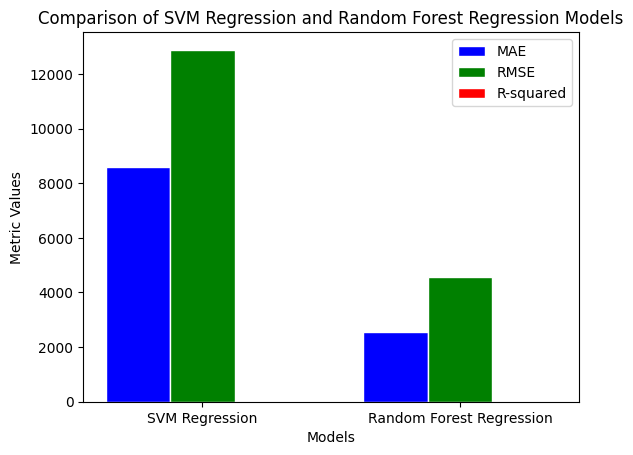

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Model names
models = ['SVM Regression', 'Random Forest Regression']

# Metrics and their values for each model
mae_values = [8612.41, 2543.98]  # MAE values for SVM and Random Forest
rmse_values = [12889.10, 4567.78]  # RMSE values for SVM and Random Forest
r2_values = [-0.07, 0.87]  # R-squared values for SVM and Random Forest

# Set the width of the bars
bar_width = 0.25

# Set the positions of the bars on the x-axis
r1 = np.arange(len(models))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Create the bar graph
plt.bar(r1, mae_values, color='blue', width=bar_width, edgecolor='white', label='MAE')
plt.bar(r2, rmse_values, color='green', width=bar_width, edgecolor='white', label='RMSE')
plt.bar(r3, r2_values, color='red', width=bar_width, edgecolor='white', label='R-squared')

# Add labels, title, and legend
plt.xlabel('Models')
plt.ylabel('Metric Values')
plt.title('Comparison of SVM Regression and Random Forest Regression Models')
plt.xticks([r + bar_width for r in range(len(models))], models)
plt.legend()

# Display the graph
plt.show()